# ANN: Regression (Website Traffic)

## Imports

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

## Loads and process data

In [2]:
df = pd.read_csv("./Data/website_data.csv")

In [3]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [4]:
df = df[['Page Views', 'Session Duration', 'Bounce Rate',
       'Time on Page', 'Previous Visits', 'Conversion Rate']]

In [5]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [6]:
df.head()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,3.890460,3,1.0
1,4,3.429316,0.391001,8.478174,0,1.0
2,4,1.621052,0.397986,9.636170,2,1.0
3,5,3.629279,0.180458,2.071925,3,1.0
4,5,4.235843,0.291541,1.960654,5,1.0


## X en y-variabelen definieren

In [7]:
X = df[['Page Views',
        'Previous Visits', 'Conversion Rate', 'Session Duration']]
# X = df[['Bounce Rate', 'Time on Page',
#         'Previous Visits', 'Conversion Rate']]
y = df[['Time on Page']]

## Test/train/validation-split

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

## Neural Network

In [9]:
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", input_shape=(4,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')

model.summary()

C:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,721 (41.88 KB)

 Trainable params: 10,721 (41.88 KB)

 Non-trainable params: 0 (0.00 B)

## Start training of NN

In [10]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.9164 - val_loss: 9.9540
Epoch 2/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0620 - val_loss: 9.3614
Epoch 3/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8972 - val_loss: 10.2417
Epoch 4/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5284 - val_loss: 8.6673
Epoch 5/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2090 - val_loss: 8.6846
Epoch 6/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3651 - val_loss: 9.0129
Epoch 7/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2680 - val_loss: 9.4731
Epoch 8/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8429 - val_loss: 8.0768
Epoch 9/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8920 - val_loss: 8.5616
Epoch 10/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2570 - val_loss: 8.2661
Epoch 11/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4954 - val_loss: 8.3761
Epoch 12/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4086 - val_loss: 7.3428
Epoch 70/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0898 - val_loss: 7.2817
Epoch 71/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3384 - val_loss: 7.4143
Epoch 72/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2842 - val_loss: 7.3069
Epoch 73/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6267 - val_loss: 7.3111
Epoch 74/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2320 - val_loss: 7.4165
Epoch 75/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4607 - val_loss: 7.3288
Epoch 76/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6521 - val_loss: 7.2712
Epoch 77/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6169 - val_loss: 7.2919
Epoch 78/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7900 - val_loss: 7.2887
Epoch 79/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4546 - val_loss: 7.3664
Epoch 80/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1150 

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1642 - val_loss: 7.3254
Epoch 138/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7119 - val_loss: 7.3881
Epoch 139/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3255 - val_loss: 7.3509
Epoch 140/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1705 - val_loss: 7.3032
Epoch 141/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2978 - val_loss: 7.3521
Epoch 142/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2190 - val_loss: 7.2920
Epoch 143/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5971 - val_loss: 7.3293
Epoch 144/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6020 - val_loss: 7.3301
Epoch 145/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5719 - val_loss: 7.4019
Epoch 146/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4282 - val_loss: 7.3791
Epoch 147/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0390 - val_loss: 7.3647
Epoch 148/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 205/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2693 - val_loss: 7.4833
Epoch 206/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3149 - val_loss: 7.4637
Epoch 207/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0383 - val_loss: 7.4861
Epoch 208/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8814 - val_loss: 7.4309
Epoch 209/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2002 - val_loss: 7.3936
Epoch 210/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2421 - val_loss: 7.4862
Epoch 211/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4471 - val_loss: 7.4534
Epoch 212/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4964 - val_loss: 7.4598
Epoch 213/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4378 - val_loss: 7.3906
Epoch 214/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1376 - val_loss: 7.4794
Epoch 215/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9802 - val_loss: 7.4376
Epoch 216/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6887 - val_loss: 7.5507
Epoch 273/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6873 - val_loss: 7.5520
Epoch 274/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1203 - val_loss: 7.4977
Epoch 275/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1189 - val_loss: 7.6246
Epoch 276/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0354 - val_loss: 7.6379
Epoch 277/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1368 - val_loss: 7.5599
Epoch 278/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2357 - val_loss: 7.6005
Epoch 279/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8653 - val_loss: 7.4557
Epoch 280/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5911 - val_loss: 7.5695
Epoch 281/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2138 - val_loss: 7.6288
Epoch 282/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3032 - val_loss: 7.5935
Epoch 283/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 340/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0478 - val_loss: 7.6047
Epoch 341/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2501 - val_loss: 7.5936
Epoch 342/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6094 - val_loss: 7.6610
Epoch 343/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2290 - val_loss: 7.7569
Epoch 344/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2325 - val_loss: 7.6652
Epoch 345/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7757 - val_loss: 7.6033
Epoch 346/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5807 - val_loss: 7.5590
Epoch 347/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2453 - val_loss: 7.6516
Epoch 348/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9662 - val_loss: 7.6517
Epoch 349/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3985 - val_loss: 7.6522
Epoch 350/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8806 - val_loss: 7.5812
Epoch 351/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6133 - val_loss: 7.7379
Epoch 408/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4414 - val_loss: 7.7129
Epoch 409/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8820 - val_loss: 7.8077
Epoch 410/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5008 - val_loss: 7.7650
Epoch 411/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6080 - val_loss: 7.7235
Epoch 412/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9186 - val_loss: 7.7788
Epoch 413/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1072 - val_loss: 7.7790
Epoch 414/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1105 - val_loss: 7.6954
Epoch 415/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7238 - val_loss: 7.7140
Epoch 416/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0530 - val_loss: 7.9285
Epoch 417/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0625 - val_loss: 7.7610
Epoch 418/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 475/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9327 - val_loss: 7.7161
Epoch 476/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5385 - val_loss: 7.9069
Epoch 477/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9408 - val_loss: 7.6856
Epoch 478/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9759 - val_loss: 7.7613
Epoch 479/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2899 - val_loss: 7.8074
Epoch 480/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7854 - val_loss: 7.9106
Epoch 481/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3361 - val_loss: 7.7752
Epoch 482/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0585 - val_loss: 7.8174
Epoch 483/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9128 - val_loss: 8.0116
Epoch 484/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0666 - val_loss: 7.9405
Epoch 485/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2337 - val_loss: 7.9210
Epoch 486/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s

## Training error metrics

<AxesSubplot:>

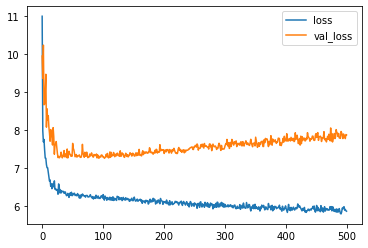

In [11]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Test/training data eval

In [12]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
6.48475980758667

Train data evaluation:
5.679350852966309


## Get test predictions for evaluation metrics

In [13]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']


pred_df

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Test True Y,Model Predictions
0,4.927558,4.117354
1,5.111094,3.988569
2,10.881304,3.977694
3,3.785420,3.941747
4,5.168080,4.223711
...,...,...
273,7.946062,3.643016
274,7.486810,4.290246
275,5.399915,3.778291
276,0.487403,3.556077


## Metrics

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

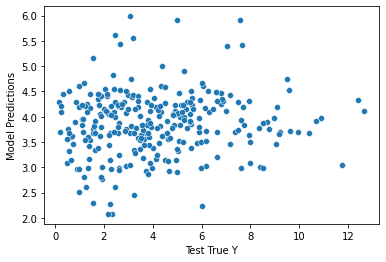

In [14]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

## Error regression metrics

In [15]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "sec")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "sec^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "sec")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
1.99 sec

MSE
6.48 sec^2

RMSE:
2.55 sec

R-squared:
-0.02

Explained variance score:
-0.01
